
# Outliers
  
Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

os outliers podem viesar negativamente todo o resultado de uma análise;
o comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers presentes em datasets  (o que são datasets) possuem diversos outros nomes, como:

- dados discrepantes;
- pontos fora da curva; (o que é curva normal?)
- observações fora do comum;
- anomalias;
- valores atípicos

Após reconhecer os dados discrepantes da sua análise, é preciso tomar certos cuidados para que a efetividade da mesma não seja comprometida. Algumas alternativas são:

1) ELIMINAR O VALOR

Caso seu dataset seja amplo o suficiente, é possível simplesmente excluir o valor anômalo sem causar grandes prejuízos à análise de dados.

2) TRATAR SEPARADAMENTE

Se a quantidade de outliers for relativamente grande, uma opção é realizar uma análise separada somente com esses dados. É possível separá-los em dois grupos e criar modelos específicos para analisá-los. Essa solução é útil para investigar casos extremos, como por exemplo casos de empresas que continuam vendendo bastante e lucrando mesmo em tempos de crise.

3) TRANSFORMAÇÃO LOGARÍTMICA

Transformar os dados logaritmicamente é uma técnica que pode diminuir a variação causada pelos valores extremos e anômalos.

4) MÉTODOS DE CLUSTERIZAÇÃO

Utilize esses métodos para achar uma aproximação que corrige e dá um novo valor aos outliers. Por exemplo, se os outliers forem causados por erros de input, ao invés de eliminar e perder uma linha inteira de registros, uma solução é usar algoritmos de clusterização. Esses algoritmos encontram o comportamento das observações mais próximas ao outlier e fazem uma interferência de qual seria o melhor valor aproximado.

In [1]:
import pandas as pd
import numpy as np

**Bora praticar!**
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?  
  
Importe a base **Loan_Default.csv** que está em csv dentro do diretório **dados**.

In [2]:
df_loan = pd.read_csv('./dados/Loan_Default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758.0,25-34,to_inst,98.728814,south,1.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552.0,55-64,to_inst,NaN,North,1.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834.0,35-44,to_inst,80.019685,south,0.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587.0,45-54,not_inst,69.376900,North,0.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602.0,25-34,not_inst,91.886544,North,0.0


In [3]:
df_loan.shape

(117044, 25)

In [4]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117044 entries, 0 to 117043
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         117044 non-null  int64  
 1   year                       117044 non-null  int64  
 2   loan_limit                 114428 non-null  object 
 3   Gender                     117044 non-null  object 
 4   approv_in_adv              116313 non-null  object 
 5   loan_type                  117044 non-null  object 
 6   loan_purpose               116940 non-null  object 
 7   Credit_Worthiness          117044 non-null  object 
 8   open_credit                117044 non-null  object 
 9   business_or_commercial     117044 non-null  object 
 10  loan_amount                117044 non-null  int64  
 11  rate_of_interest           88391 non-null   float64
 12  interest_only              117043 non-null  object 
 13  lump_sum_payment           11

In [6]:
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,117044.000000,117044.0,1.170440e+05,88391.000000,1.052180e+05,109879.000000,117043.000000,105218.000000,117043.000000
mean,83411.500000,2019.0,3.307953e+05,4.045446,4.975552e+05,6952.177759,699.859129,72.808342,0.246157
std,33787.836791,0.0,1.836386e+05,0.561351,3.619082e+05,6547.280574,115.942163,43.390083,0.430773
min,24890.000000,2019.0,6.060000e+02,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,54150.750000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,83411.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5700.000000,699.000000,75.152439,0.000000
75%,112672.250000,2019.0,4.365000e+05,4.375000,6.180000e+05,8520.000000,801.000000,86.369193,0.000000
max,141933.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


missing values

In [10]:
(df_loan.isnull().sum() / len(df_loan))*100

ID                            0.000000
year                          0.000000
loan_limit                    2.235057
Gender                        0.000000
approv_in_adv                 0.624551
loan_type                     0.000000
loan_purpose                  0.088855
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.480537
interest_only                 0.000854
lump_sum_payment              0.000854
property_value               10.103893
construction_type             0.000854
occupancy_type                0.000854
income                        6.121629
credit_type                   0.000854
Credit_Score                  0.000854
age                           0.136701
submission_of_application     0.136701
LTV                          10.103893
Region                        0.000854
Status                        0.000854
dtype: float64

### Identificando os outliers

Uma forma de identificar estatisticamente os outliers é utilizando o **boxplot**.

Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.  

<p align='center'> 
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
</p>

In [12]:
df_loan[['Credit_Score']].describe()

,Credit_Score
count,117043.000000
mean,699.859129
std,115.942163
min,500.000000
25%,599.000000
50%,699.000000
75%,801.000000
max,900.000000


<AxesSubplot:>

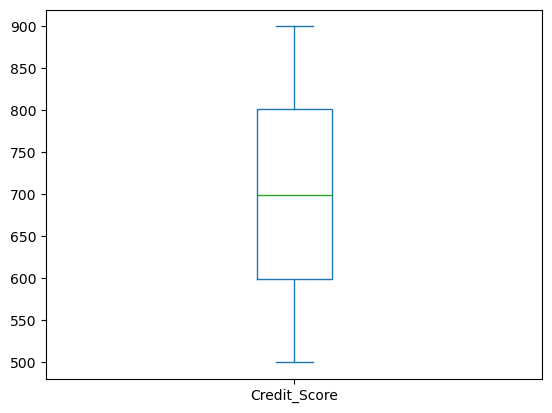

In [13]:
df_loan[['Credit_Score']].plot(kind='box')

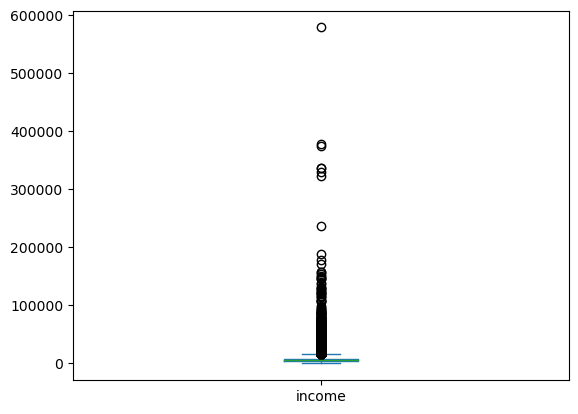

In [16]:
df_loan[['income']].plot(kind='box');

Vamos analisar nossa variável de interesse **Status**

In [17]:
df_loan['Status'].value_counts()

0.0    88232
1.0    28811
Name: Status, dtype: int64

In [18]:
df_loan['Status'].value_counts(normalize=True)

0.0    0.753843
1.0    0.246157
Name: Status, dtype: float64

In [20]:
df_loan['Status'].mean()

0.24615739514537394

In [23]:
df_loan['age'].value_counts()

45-54    27371
35-44    25847
55-64    25569
65-74    16281
25-34    15117
>74       5663
<25       1036
Name: age, dtype: int64

In [24]:
df_loan['credit_type'].value_counts()

CIB     37959
CRIF    34535
EXP     32563
EQUI    11986
Name: credit_type, dtype: int64

In [25]:
df_loan['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB', nan], dtype=object)

Agora podemos verificar as relações das variáveis presentes no dataset com a nossa variável de interesse.

In [26]:
df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean')

,Status
credit_type,
CIB,0.158539
CRIF,0.162791
EQUI,0.999917
EXP,0.159261


In [27]:
df_loan.pivot_table(index='Region', values='Status', aggfunc='mean')

,Status
Region,
North,0.223902
North-East,0.305296
central,0.276260
south,0.266903


In [29]:
df_loan.pivot_table(index='age', values='Status', aggfunc='mean')

,Status
age,
25-34,0.222068
35-44,0.221805
45-54,0.240656
55-64,0.258125
65-74,0.268780
<25,0.291506
>74,0.299664


In [30]:
df_loan.pivot_table(index='age', columns='credit_type' ,values='Status', aggfunc='mean')

credit_type,CIB,CRIF,EQUI,EXP
age,,,,
25-34,0.140685,0.139584,1.000000,0.132067
35-44,0.133107,0.143454,0.999601,0.139235
45-54,0.157912,0.167046,1.000000,0.157669
55-64,0.171146,0.179521,1.000000,0.179321
65-74,0.177193,0.170124,1.000000,0.178993
<25,0.204893,0.221239,1.000000,0.176471
>74,0.210012,0.185386,1.000000,0.185864


In [31]:
df_loan.corr()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
ID,1.000000,NaN,-0.005252,0.000577,-0.000840,0.001887,-0.000766,-0.005568,0.001626
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.005252,NaN,1.000000,-0.151755,0.730958,0.454937,0.004136,0.036887,-0.035785
rate_of_interest,0.000577,NaN,-0.151755,1.000000,-0.125196,-0.042804,-0.001647,0.000369,0.021857
property_value,-0.000840,NaN,0.730958,-0.125196,1.000000,0.413022,0.002474,-0.199328,-0.046881
income,0.001887,NaN,0.454937,-0.042804,0.413022,1.000000,0.000367,-0.066805,-0.063128
Credit_Score,-0.000766,NaN,0.004136,-0.001647,0.002474,0.000367,1.000000,-0.006280,0.005494
LTV,-0.005568,NaN,0.036887,0.000369,-0.199328,-0.066805,-0.006280,1.000000,0.035755
Status,0.001626,NaN,-0.035785,0.021857,-0.046881,-0.063128,0.005494,0.035755,1.000000
